In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
sys.path.append('../')
import utils

In [3]:
# Gathering data
df       = pd.read_csv("../../data/chessdotcom/matches.csv")
# Lendo os users escolhidos
f        = open("../../data/chessdotcom/chosen_players.txt", "r")
chosen   = np.array([x[:-1] for x in f.readlines()])
# Ordenando para a busca binária
chosen   = np.sort(chosen)

#### Coletando dados: Jan 2019 - Mar 2020

In [5]:
first_date = min(df["end_time"]) 
last_date  = max(df["end_time"])
date       = 1583020800 # Sunday, 1 March 2020 00:00:00
final      = True # Use as ending of the period? If not will use as beginning
nmatches   = utils.countMatches(df, chosen, date, final = final)
ndays      = (date - first_date if final else last_date - date)/86400

# Remove 0's and normalize by days
keys = list(nmatches.keys())
for key in keys:
    if nmatches[key] == 0: del nmatches[key]
    else: nmatches[key] = float(nmatches[key]/ndays)

 35%|███▍      | 1371941/3970491 [00:41<01:18, 33027.07it/s]


[]

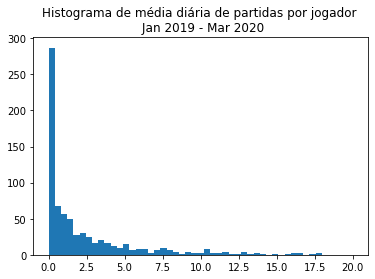

In [6]:
plt.hist(nmatches.values(), bins = np.linspace(0,20))
plt.title("Histograma de média diária de partidas por jogador \n Jan 2019 - Mar 2020")
plt.plot()

In [ ]:
# Intervalo de Confiança sem Bootstrap:
utils.confidenceInterval(np.array(list(nmatches.values())))

#### Agora vamos fazer um Bootstrap para analisar qual o intervalo de confiança de média das amostras.

In [7]:
def bootstrap_mean(nme, n):
    values = np.zeros(n)
    for i in range(n):
        sample    = nme.sample(len(nme), replace = True)
        values[i] = sample.mean()
    return values

def percentile(bm_values, init, final):
#     bm_values = np.sort(bm_values)
#     per1      = int(len(bm_values) / 100 * init)
#     per2      = int(len(bm_values) / 100 * final)
#     inferior  = bm_values[per1]
#     superior  = bm_values[per2]
    inferior = np.percentile(bm_values, init)
    superior = np.percentile(bm_values, final)
    return [inferior, superior]

In [8]:
# 20000 Amostras
pop   = pd.Series(nmatches.values())
bmean = bootstrap_mean(pop, 100000)

[]

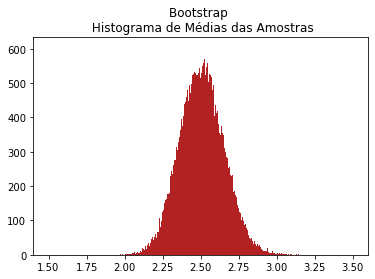

In [9]:
plt.hist(bmean, color = "firebrick", bins = np.linspace(1.5, 3.5, 1000))
plt.title("Bootstrap \n Histograma de Médias das Amostras")
plt.savefig("bootstrap_graph.png", edgecolor = 'b')
plt.plot()

#### Resultado:

In [20]:
percentile(bmean, 5, 95)

[2.2720347997542802, 2.7532225173700184]

#### Coletando dados: Mar 2020 - Dez 2020

In [10]:
first_date = min(df["end_time"]) 
last_date  = max(df["end_time"])
date       = 1583020800 # Sunday, 1 March 2020 00:00:00
final      = False # Use as ending of the period? If not will use as beginning
nmatches   = utils.countMatches(df, chosen, date, final = final)
ndays      = (date - first_date if final else last_date - date)/86400

# Remove 0's and normalize by days
keys = list(nmatches.keys())
for key in keys:
    if nmatches[key] == 0: del nmatches[key]
    else: nmatches[key] = float(nmatches[key]/ndays)

 65%|██████▌   | 2598550/3970491 [01:13<00:39, 35122.89it/s]


Média de Partidas no Período:

In [11]:
np.array(list(nmatches.values())).mean()

2.7714852402374706

#### Condensando o resultado em um gráfico

In [17]:
from matplotlib import rc
font = {'size'   : 10}

rc('font', **font)

plt.style.use('seaborn-colorblind')
plt.ion()

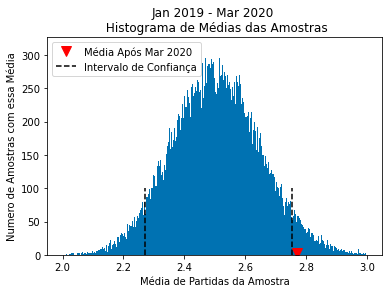

In [19]:
confidence = percentile(bmean, 5, 95)
mean       = np.array(list(nmatches.values())).mean()
plt.hist(bmean, bins = np.linspace(2, 3, 1000))
plt.vlines(confidence, 0, 100, color = "black", linestyles = "dashed", label = "Intervalo de Confiança")
plt.title("Jan 2019 - Mar 2020 \n Histograma de Médias das Amostras")
plt.xlabel("Média de Partidas da Amostra")
plt.ylabel("Numero de Amostras com essa Média")
plt.plot(mean, 2,'v', markersize = 10, color = "red", label = "Média Após Mar 2020")
plt.legend()
plt.savefig("../../results/graphs/confidence_graph.png", edgecolor = 'b')